# **Downloading data from kaggle**

In [0]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedsaad154","key":"28f09975efa5728913ee45c59e0576e9"}'}

In [0]:
%cd /root
!mkdir .kaggle
!mv /content/kaggle.json /root/.kaggle
%cd /root/.kaggle
!ls

/root
/root/.kaggle
kaggle.json


In [0]:
!kaggle competitions download -c tensorflow-speech-recognition-challenge

  0% 0.00/501k [00:00<?, ?B/s]
100% 501k/501k [00:00<00:00, 69.9MB/s]
 98% 1.03G/1.04G [00:19<00:00, 45.9MB/s]
100% 1.04G/1.04G [00:19<00:00, 56.3MB/s]
 99% 2.45G/2.46G [01:22<00:00, 26.8MB/s]
100% 2.46G/2.46G [01:22<00:00, 32.1MB/s]
  0% 0.00/50.0 [00:00<?, ?B/s]
100% 50.0/50.0 [00:00<00:00, 48.5kB/s]


In [0]:
%cd /root/.kaggle
!ls

/root/.kaggle
kaggle.json		      sample_submission.7z  train.7z
link_to_gcp_credits_form.txt  test.7z


In [0]:
!mkdir train
!mkdir test
!mkdir sample_submission


In [0]:
!cp /root/.kaggle/train.7z /root/.kaggle/train
!cp /root/.kaggle/test.7z /root/.kaggle/test
!cp /root/.kaggle/sample_submission.7z /root/.kaggle/sample_submission


# **Google Drive mount**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Unzipping the train dataset**

In [0]:
%cd /root/.kaggle/train
!ls


/root/.kaggle/train
train.7z


In [0]:
!7za x train.7z 


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1121103842 bytes (1070 MiB)

Extracting archive: train.7z
--
Path = train.7z
Type = 7z
Physical Size = 1121103842
Headers Size = 389133
Method = Delta LZMA2:24
Solid = +
Blocks = 2

  0%      0% 39 - train/audio/_background_noise_/dude_miaowing.wav                                                            0% 41 - train/audio/_background_noise_/pink_noise.wav                                                         0% 70 - train/audio/bed/042186b8_nohash_0.wav

In [0]:
#!cp -a /root/.kaggle/train/train/. /content/drive/My\ Drive/NLP_Dataset/


In [0]:
#%cd /content/drive/My\ Drive/NLP_Dataset/audio
#!ls

# **Handling the unknown class**

In [0]:
%cd /root/.kaggle/train/train/audio
!mkdir unknown
!ls

/root/.kaggle/train/train/audio
_background_noise_  dog    four   left	  off	 seven	 three	  up
bed		    down   go	  marvin  on	 sheila  tree	  wow
bird		    eight  happy  nine	  one	 six	 two	  yes
cat		    five   house  no	  right  stop	 unknown  zero


In [0]:
!cp -a /content/drive/My\ Drive/NLP_Dataset/unknown/. /root/.kaggle/train/train/audio/unknown/


In [0]:
%cd /root/.kaggle/train/train/audio/unknown/
!ls

# **Unzipping the test dataset**


In [0]:
%cd /root/.kaggle/test
!ls


/root/.kaggle/test
test.7z


In [0]:
!7za x test.7z 



7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 2640679130 bytes (2519 MiB)

Extracting archive: test.7z
--
Path = test.7z
Type = 7z
Physical Size = 2640679130
Headers Size = 1345163
Method = Delta LZMA2:24
Solid = +
Blocks = 3

  0%      0% 165 - test/audio/clip_003f9022a.wav                                          0% 361 - test/audio/clip_0095073b5.wav                                          0% 558 - test/audio/clip_00f7ec4f8.wav                                          0% 768 - test/audio/clip_0148fabcf.wav

In [0]:
!ls

sample_data


In [0]:
%cd /root/.kaggle/test/test
!ls

[Errno 2] No such file or directory: '/root/.kaggle/test/test'
/content
sample_data


In [0]:
#!cp -a /root/.kaggle/test/test/. /content/drive/My\ Drive/NLP_Dataset/test


In [0]:
#%cd /content/drive/My\ Drive/NLP_Dataset/
#!ls

# **Copying the dataset from drive to th VM**

In [0]:
%cd /content/
!mkdir train_data
!cp -a  /content/drive/My\ Drive/NLP_Dataset/audio/. /content/train_data/


/content
^C


# **Exploring the data**

In [0]:
#%cd /content/drive/My\ Drive/NLP_Dataset/audio/bed
#!ls
#!cp -a /content/drive/My\ Drive/NLP_Dataset/audio/bed/4c4d2526_nohash_0.wav /content/


In [0]:
from scipy.io import wavfile
#sound_file = '/content/drive/My Drive/NLP_Dataset/audio/bed/4c4d2526_nohash_0.wav'
sound_file = '/root/.kaggle/train/train/audio/bed/4c4d2526_nohash_0.wav'
fs, data = wavfile.read(sound_file)
print('the number of samples are '+ str(data.shape[0]) + '\n the sampling frequency is '+ str(fs))


the number of samples are 16000
 the sampling frequency is 16000


In [0]:
from IPython.display import Audio
Audio(data,rate=fs,autoplay=True)


/content/drive/My Drive/NLP_Dataset/codes


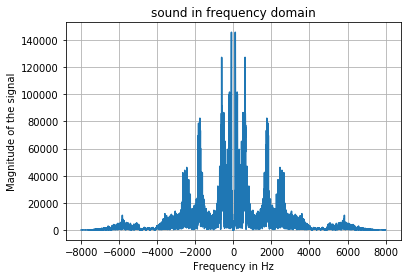

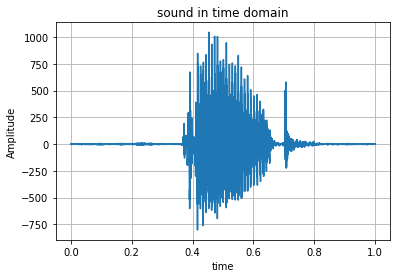

In [0]:
%cd /content/drive/My\ Drive/NLP_Dataset/codes
from soundplot import plotFreq, plotTime
plotFreq(data, fs, 'sound in frequency domain')
plotTime(data, fs, 'sound in time domain')


In [0]:
# investigating the number of labels
import os
from os.path import isdir, join
train_audio_path = '/root/.kaggle/train/train/audio'
dirs=[]
for f in os.listdir(train_audio_path):
  if isdir(join(train_audio_path, f)):
    dirs.append(f)
dirs.sort()
print('Number of labels: ' + str(len(dirs)))
print(dirs)


Number of labels: 32
['_background_noise_', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'unknown', 'up', 'wow', 'yes', 'zero']


In [0]:
# investigating the number of samples of each label
import plotly.graph_objs as go
import plotly.offline as py

number_of_recordings = []
for direct in dirs:
    waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
    number_of_recordings.append(len(waves))

# Plot
data = [go.Histogram(x=dirs, y=number_of_recordings)]
trace = go.Bar(
    x=dirs,
    y=number_of_recordings,
)
layout = go.Layout(
    title='Number of recordings in given label',
    xaxis = dict(title='Words'),
    yaxis = dict(title='Number of recordings')
)
py.iplot(go.Figure(data=[trace], layout=layout))


In [0]:
%cd /root/.kaggle/train/train/
!ls
testing_id = open("testing_list.txt").read().splitlines()
validation_id = open("validation_list.txt").read().splitlines()
#'bed/b1f8326d_nohash_0.wav' in validation_list
print('len of test set is ' + str(len(testing_id)) )
print('len of validation set is ' + str(len(validation_id)) )
print(testing_id[0].split('_',1)[0])

/root/.kaggle/train/train
audio  LICENSE	README.md  testing_list.txt  validation_list.txt
len of test set is 6835
len of validation set is 6798
bed/0c40e715


# **Check the singularity of IDs**

In [0]:
samples_id = []
train_id = []
for direct in dirs:
  if (direct == '_background_noise_'):
    continue
  waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
  for wav in waves:
    sampleId = join(direct, wav)
    if sampleId in testing_id :
      a = 0
    elif sampleId in validation_id :
      a=0
    else:
      # add the sample to the train set
      train_id.append(sampleId.split('_',1)[0])
    sampleId = sampleId.split('_',1)[0]
    samples_id.append(sampleId)
    


In [0]:
samples_idS = set(samples_id)
print(len(samples_idS))
print(len(samples_id))

35603
64721


In [0]:
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        return True 
    else: 
        return False

In [0]:
testing_idN = []
validation_idN = []
for x in testing_id:
  testing_idN.append(x.split('_',1)[0])

for x in validation_id:
  validation_idN.append(x.split('_',1)[0])


In [0]:
testing_idNS = set(testing_idN)
print(len(testing_idNS))
print(len(testing_idN))

3637
6835


In [0]:
validation_idNS = set(validation_idN)
print(len(validation_idNS))
print(len(validation_idN))

3663
6798


In [0]:
common_member(testing_idNS, validation_idNS)

False

In [0]:
train_id
train_idS = set(train_id)
print(len(train_idS))
print(len(train_id))

28303
51088


In [0]:
common_member(testing_idNS, train_id)

False

# **Noise preprocessing**

In [0]:
import numpy as np


In [0]:
# Noise reading
from scipy.io import wavfile
noise = []
for direct in dirs:
  if (direct == '_background_noise_'):
    waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
    for wav in waves:
        sound_file = join( join(train_audio_path, direct),wav)
        samples, sample_rate = librosa.core.load(sound_file,sr=None)
        #sample_rate, samples = wavfile.read(join( join(train_audio_path, direct),wav) )
        print(str(int(np.floor(samples.shape[0]/sample_rate))))
        chunks = int(np.floor((samples.shape[0])/(sample_rate)))
        samples = samples[:chunks*sample_rate]
        samples = samples.reshape((chunks,sample_rate))
        for sample in samples:
          noise.append(sample)
        #print(join( join(train_audio_path, direct),wav))
        #break
  
#print('Number of recordings shorter than 1 second: ' + str(num_of_shorter))
#print('Number of recordings longer than 1 second: ' + str(num_of_longer))

61
60
61
95
60
61


/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning:

Chunk (non-data) not understood, skipping it.



In [0]:
noise = np.asarray(noise)

In [0]:
noise.shape

(398, 16000)

# **Silence handling**

In [0]:
pip install webrtcvad

     |████████████████████████████████| 71kB 2.2MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp36-cp36m-linux_x86_64.whl size=71338 sha256=fc05e1579e5b7f1a3328f10d2f850d5ee64c5c7c01fa3de26993e63a47625f3e
  Stored in directory: /root/.cache/pip/wheels/44/2a/18/bd1aec41cac7c3051fe95d92a6ed446122ea31dc713c432fa1
Successfully built webrtcvad


In [0]:
from scipy.io import wavfile
import numpy as np
import webrtcvad

In [0]:
def silenceRemoval(sound_file, fs, mode = 3, chunk = 10):
  vad = webrtcvad.Vad()
  vad.set_mode(mode)
  soundSamples = sound_file.shape[0]
  chunkSamples = fs * chunk * (10**-3)
  #duration = (soundSamples/fs) * 1000 # put it in ms
  # make the duration divisible by the chunk
  remain = soundSamples % chunkSamples
  # padding my signal with (chunkSamples - remain)
  if remain != 0:
    zero_padding = int(chunkSamples - remain)
    sound_file = np.pad(sound_file, (0,zero_padding), 'constant', constant_values=(0,0))
  sound_file = sound_file.reshape(int(soundSamples / chunkSamples),-1)
  deleted_rows = []
  silence = 0
  voice = 0
  for i in range(sound_file.shape[0]):
    frame = bytes(sound_file[i])
    #print(vad.is_speech(frame, fs))
    if not vad.is_speech(frame, fs):
      #print('silence')
      silence+=1
      deleted_rows.append(i)
    else:
      #print('voice activity')
      voice +=1
  #sound_file = np.delete(sound_file, deleted_rows, axis=0)
  #sound_file = sound_file.reshape(sound_file.shape[0]*sound_file.shape[1],)
  return silence,voice #sound_file, sound_file.shape[0]
  
  #return

In [0]:
from scipy.io import wavfile
sound_file = '/content/drive/My Drive/NLP_Dataset/audio/bed/4c4d2526_nohash_0.wav'
fs, data = wavfile.read(sound_file)
silence,voice = silenceRemoval(data, fs,mode = 3, chunk = 10)
print('number of silence chuncks is  ' + str(silence))
print('number of voice chuncksis  ' + str(voice))

number of silence chuncks is  66
number of voice chuncksis  34


In [0]:
voice_percentage = []
data_silence = []
silence_id = []
threshold = 0.05
#upper_threshold = 0.97
#noised_id = []
#data_noised = []

for direct in dirs:
  if (direct == '_background_noise_'):
    continue
  waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
  for wav in waves:
      sample_rate, samples = wavfile.read(join( join(train_audio_path, direct),wav) )
      #print(join( join(train_audio_path, direct),wav))
      #break
      if samples.shape[0] < sample_rate:
          zero_padding = sample_rate - samples.shape[0]
          # zero padding from the end of the signal
          samples = np.pad(samples, (0,zero_padding), 'constant', constant_values=(0,0))

      silence,voice = silenceRemoval(samples, sample_rate,mode = 2, chunk = 10)
      percentage = voice/(silence+voice)
      voice_percentage.append(percentage)
      if percentage <= threshold:
        data_silence.append(str(join( join(train_audio_path, direct),wav)))
        silence_id.append(join(direct, wav))
      #elif percentage >= upper_threshold:
        #data_noised.append(str(join( join(train_audio_path, direct),wav)))
        #noised_id.append(join(direct, wav))
      

  #break


In [0]:
len(data_silence)

441

In [0]:
#len(noised_id)

In [0]:
sound_file = data_silence[440]
fs, data = wavfile.read(sound_file)
from IPython.display import Audio
Audio(data,rate=fs,autoplay=True)

In [0]:
min(voice_percentage)

0.0

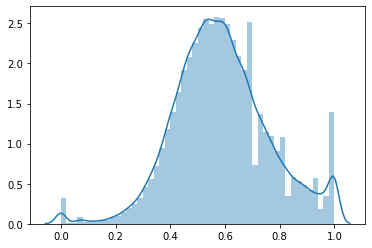

In [0]:
import seaborn as sns
sns.distplot(voice_percentage);


In [0]:
silence_id[1]


'bed/ced835d3_nohash_0.wav'

# **Removing bad samples**

In [0]:
pip install python_speech_features


  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5889 sha256=5dad6c39499e87da5933500ddc5271db54bdc8467ecad164cbe2916789ae5b8b
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
from librosa.feature import mfcc
from librosa import load
import numpy as np

#from python_speech_features import mfcc


sound_file = '/root/.kaggle/train/train/audio/eight/fd395b74_nohash_2.wav'
#fs, data = wavfile.read(sound_file)
samples, sample_rate = load(sound_file)#, sr=None)


def is_bad_audio(data, fs):
    features = mfcc(data, fs)
    mean_frequencies = np.mean(features, axis=1)
    s = sum(mean_frequencies)
    t = np.std(mean_frequencies)
    if t < 0.01:
        # silent
        return True
    elif (s > 20 and t < 0.2):
        # noisy
        return True
    elif (s > 30 and t > 1):
        # distorted
        return True
    return False

is_bad_audio(samples, sample_rate)


False

In [0]:
bad_signals = 0
total_signal = 0

for direct in dirs:
  if (direct == '_background_noise_'):
    continue
  waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
  print('start processing in ' + direct)
  for wav in waves:
      samples, sample_rate = load(join( join(train_audio_path, direct),wav))
      if is_bad_audio(samples, sample_rate) :
        bad_signals = bad_signals + 1
      #break
      total_signal = total_signal + 1
  print(str(i))
  print('finished processing in ' + direct)
  #break


print(str(i))
      
      


In [0]:
from IPython.display import Audio
Audio(samples,rate=sample_rate,autoplay=True)

# **Padding**

In [0]:
# all samples duration should be 1 sec
# adding the zero padding
import numpy as np
train = []
test = []
validation = []
labels_train = []
labels_test = []
labels_validation = []
unknown = []
labels_unknown = []

for direct in dirs:
  if (direct == '_background_noise_'):
    continue
  waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
  for wav in waves:
      sound_file = join( join(train_audio_path, direct),wav)
      samples, sample_rate = librosa.core.load(sound_file,sr=None)
      #sample_rate, samples = wavfile.read(join( join(train_audio_path, direct),wav) )
      #print(join( join(train_audio_path, direct),wav))
      #break
      if samples.shape[0] < sample_rate:
          zero_padding = sample_rate - samples.shape[0]
          # zero padding from the end of the signal
          samples = np.pad(samples, (0,zero_padding), 'constant', constant_values=(0,0))
      # Handling the unknown class
      if (direct == 'unknown'):
        unknown.append(samples)
        labels_unknown.append(direct)
        continue
      # adding the wav to its list
      sample_id = join(direct, wav)
      if sample_id in silence_id:
        continue
      if sample_id in testing_id :
        # add the sample to test set
        test.append(samples)
        labels_test.append(direct)
      elif sample_id in validation_id :
        # add the sample to the validation set
        validation.append(samples)
        labels_validation.append(direct)
      else:
        # add the sample to the train set
        train.append(samples)
        labels_train.append(direct)
      #break
      
      

  #break


In [0]:
def splitting_unknown(unknown, percentage):
    np.random.seed(1)
    np.random.shuffle(unknown)
    train_len = int(len(unknown) * percentage)
    test_len = int(len(unknown) * (1-percentage) / 2)
    train_unknown = unknown[0:train_len]
    validation_unknown = unknown[train_len:(train_len+test_len)]
    test_unknown = unknown[(train_len+test_len):]
    return train_unknown,validation_unknown,test_unknown

In [0]:
train_unknown,validation_unknown,test_unknown = splitting_unknown(unknown, 0.8)

In [0]:
train = train + train_unknown
validation = validation + validation_unknown
test = test + test_unknown
labels_train = labels_train + labels_unknown[:len(train_unknown)]
labels_validation = labels_validation + labels_unknown[:len(validation_unknown)]
labels_test = labels_test + labels_unknown[:len(test_unknown)]

In [0]:
del unknown
del labels_unknown
del train_unknown
del validation_unknown
del test_unknown

# **Submission padding**

# **List2arr**




In [0]:
# use del to avoid crashing
train = np.asarray(train)
test = np.asarray(test)
validation = np.asarray(validation)
labels_train = np.asarray(labels_train)
labels_test = np.asarray(labels_test)
labels_validation = np.asarray(labels_validation)

# **Augmentation nlpaugdev**

In [0]:
import librosa
import numpy as np

In [0]:
pip install git+https://github.com/makcedward/nlpaug.git numpy matplotlib python-dotenv

  Cloning https://github.com/makcedward/nlpaug.git to /tmp/pip-req-build-pt_dk5jn
  Running command git clone -q https://github.com/makcedward/nlpaug.git /tmp/pip-req-build-pt_dk5jn
  Created wheel for nlpaug: filename=nlpaug-0.0.11-cp36-none-any.whl size=93389 sha256=56739021a0c6c185468d1183cd8a5bf018915e705d8c1159a3dd4d21a4f7ece2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ezx3x_9d/wheels/2b/ef/30/a4e22f9a97373c9ab6763670c94aa5e111b0b956983f3892a4
Successfully built nlpaug


In [0]:
import nlpaug.augmenter.audio as naa

In [0]:
sound_file = '/content/drive/My Drive/NLP_Dataset/audio/bed/4c4d2526_nohash_0.wav'
#sound_file = '/root/.kaggle/train/train/audio/bed/4c4d2526_nohash_0.wav'
data, fs = librosa.core.load(sound_file,sr=None)
print('the number of samples are '+ str(data.shape[0]) + '\n the sampling frequency is '+ str(fs))

the number of samples are 16000
 the sampling frequency is 16000


In [0]:
#dataset = np.tile(data,(3,1))

In [0]:
#dataset.shape

(3, 16000)

In [0]:
#dataset[2,752]

-3.0517578e-05

In [0]:
from IPython.display import Audio
Audio(data,rate=fs,autoplay=True)

In [0]:
aug_vol = naa.LoudnessAug(zone=(0.1, 0.9),
                      coverage=0.45,
                      factor=(0.5, 5))

In [0]:
augmented_data = aug_vol.augment(data)

In [0]:
augmented_data[8500]/data[8500]

2.7105176

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

In [0]:
aug_mask = naa.MaskAug(sampling_rate=fs,
                       zone=(0.1, 0.9),
                       coverage=0.3,
                       #mask_factor=2,
                       mask_with_noise=False)

In [0]:
augmented_data = aug_mask.augment(data)

In [0]:
augmented_data.shape

(16000,)

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

In [0]:
aug_noise_white = naa.NoiseAug(zone=(0.1, 0.9),
                         coverage=0.6,
                         color='white',
                         noises=None)

In [0]:
augmented_data = aug_noise_white.augment(data)

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

In [0]:
aug_noise_pink = naa.NoiseAug(zone=(0.1, 0.9),
                         coverage=1,
                         color='pink',
                         noises=None)

In [0]:
augmented_data = aug_noise_pink.augment(data)

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

In [0]:
aug_noise_blue = naa.NoiseAug(zone=(0.1, 0.8),
                         coverage=0.002,
                         color='blue',
                         noises=None)

In [0]:
augmented_data = aug_noise_blue.augment(data)

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

In [0]:
aug_noise_purple = naa.NoiseAug(zone=(0.1, 0.8),
                         coverage=0.0002,
                         color='purple',
                         noises=None)

In [0]:
augmented_data = aug_noise_purple.augment(data)

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

In [0]:
type(data)

numpy.ndarray

In [0]:
aug_pitch=naa.PitchAug(fs,
                       zone=(0.1, 0.9),
                       coverage=0.5,
                       factor=(-10, 10))

In [0]:
augmented_data = aug_pitch.augment(data)

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

In [0]:
aug_shift=naa.ShiftAug(fs,
                       duration=0.35,
                       direction='random')

In [0]:
augmented_data = aug_shift.augment(data)

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

In [0]:
aug_speed = naa.SpeedAug(zone=(0.1, 0.9),
                         coverage=0.5,
                         factor=(0.5, 2))

In [0]:
augmented_data = aug_speed.augment(data)

In [0]:
augmented_data.shape[0]

14208

In [0]:
if fs > augmented_data.shape[0]:
  zero_padding = fs - augmented_data.shape[0]
  # zero padding from the end of the signal
  augmented_data = np.pad(augmented_data, (0,zero_padding), 'constant', constant_values=(0,0))
else:
  augmented_data = augmented_data[0:fs]

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

In [0]:
aug_vt = naa.VtlpAug(fs,
                     zone=(0.1, 0.9),
                     coverage=0.7,
                     fhi=4800,
                     factor=(0.7, 7))

In [0]:
augmented_data = aug_vt.augment(data)

In [0]:
augmented_data.shape[0]

15744

In [0]:
if fs > augmented_data.shape[0]:
  zero_padding = fs - augmented_data.shape[0]
  # zero padding from the end of the signal
  augmented_data = np.pad(augmented_data, (0,zero_padding), 'constant', constant_values=(0,0))
else:
  augmented_data = augmented_data[0:fs]

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

In [0]:
aug_crop = naa.CropAug(fs,
                       zone=(0.1, 0.9),
                       coverage=0.25)

In [0]:
augmented_data = aug_crop.augment(data)

In [0]:
augmented_data.shape[0]

12800

In [0]:
if fs > augmented_data.shape[0]:
  zero_padding = fs - augmented_data.shape[0]
  # zero padding from the end of the signal
  augmented_data = np.pad(augmented_data, (0,zero_padding), 'constant', constant_values=(0,0))
else:
  augmented_data = augmented_data[0:fs]

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

In [0]:
augmented_data.shape[0]

16000

# **Augmentation (nlpaug)**

In [0]:
import librosa
import numpy as np

In [0]:
pip install git+https://github.com/makcedward/nlpaug.git numpy matplotlib python-dotenv

  Cloning https://github.com/makcedward/nlpaug.git to /tmp/pip-req-build-3qej5ev4
  Running command git clone -q https://github.com/makcedward/nlpaug.git /tmp/pip-req-build-3qej5ev4
  Created wheel for nlpaug: filename=nlpaug-0.0.11-cp36-none-any.whl size=93389 sha256=4512187be0bb4142f26a3ebcd8cc8464e6153a821cf7e4b6dcf933a4d037b48a
  Stored in directory: /tmp/pip-ephem-wheel-cache-5gswc0za/wheels/2b/ef/30/a4e22f9a97373c9ab6763670c94aa5e111b0b956983f3892a4
Successfully built nlpaug


In [0]:
import nlpaug.augmenter.audio as naa

In [0]:
def input_padding(signal,fs):
  if fs > augmented_data.shape[0]:
    zero_padding = fs - augmented_data.shape[0]
    # zero padding from the end of the signal
    augmented_data = np.pad(augmented_data, (0,zero_padding), 'constant', constant_values=(0,0))
  else:
    augmented_data = augmented_data[0:fs]
  return

In [0]:
aug_vol = naa.LoudnessAug(zone=(0.1, 0.9),
                      coverage=0.45,
                      factor=(0.5, 5))

In [0]:
aug_mask = naa.MaskAug(sampling_rate=fs,
                       zone=(0.1, 0.9),
                       coverage=0.3,
                       #mask_factor=2,
                       mask_with_noise=False)

In [0]:
aug_noise_white = naa.NoiseAug(zone=(0.1, 0.9),
                         coverage=0.6,
                         color='white',
                         noises=None)

In [0]:
aug_noise_pink = naa.NoiseAug(zone=(0.1, 0.9),
                         coverage=1,
                         color='pink',
                         noises=None)

In [0]:
aug_noise_blue = naa.NoiseAug(zone=(0.1, 0.8),
                         coverage=0.002,
                         color='blue',
                         noises=None)

In [0]:
aug_noise_purple = naa.NoiseAug(zone=(0.1, 0.8),
                         coverage=0.0002,
                         color='purple',
                         noises=None)

In [0]:
aug_pitch=naa.PitchAug(fs,
                       zone=(0.1, 0.9),
                       coverage=0.5,
                       factor=(-10, 10))

In [0]:
aug_shift=naa.ShiftAug(fs,
                       duration=0.35,
                       direction='random')

In [0]:
aug_speed = naa.SpeedAug(zone=(0.1, 0.9),
                         coverage=0.5,
                         factor=(0.5, 2))

In [0]:
aug_vt = naa.VtlpAug(fs,
                     zone=(0.1, 0.9),
                     coverage=0.7,
                     fhi=4800,
                     factor=(0.7, 7))

In [0]:
aug_crop = naa.CropAug(fs,
                       zone=(0.1, 0.9),
                       coverage=0.25)

In [0]:
augmented_data = aug_pitch.augments(list(train[0]))

TypeError: ignored

In [0]:
train[0]

array([-130, -128, -133, ...,  236,  222,  236], dtype=int16)

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

# **Augmentation(dev)**

In [0]:
def noise_injection(data, noise_interval):
    # data is passed (samples,time-axis)
    noise = np.random.randn(data.shape[0],data.shape[1])
    noise_factor = np.random.uniform(noise_interval[0],noise_interval[1],noise.shape[0])
    noise_factor = noise_factor[:,None]
    print(str(noise_factor))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

In [0]:
def time_shifting(data, sampling_rate, shift_interval_time):
    # shifting interval time is in ms
    # data is passed (samples,time-axis)
    shift = np.random.randint(low = sampling_rate * shift_interval_time[0],
                              high = sampling_rate * shift_interval_time[1],
                              size = (data.shape[0]))
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

In [0]:
data = data[None,:]

In [0]:
data.shape

(1, 16000)

In [0]:
data[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.1035156e-05,
       0.0000000e+00, 3.0517578e-05], dtype=float32)

In [0]:
len(data.shape)

2

In [0]:
from IPython.display import Audio
Audio(data,rate=fs,autoplay=True)

In [0]:
type(data)

numpy.ndarray

In [0]:
noise_interval = [0.01, 0.001]

In [0]:
augmented_data = noise_injection(data, noise_interval)

[[0.00292725]]


In [0]:
augmented_data.shape

(1, 16000)

In [0]:
Audio(augmented_data,rate=fs,autoplay=True)

In [0]:
noise.shape[0]

NameError: ignored

In [0]:
noised = 0.0001* noise[300] + data

In [0]:
noised = noised.astype(type(data[0]))

In [0]:
noised.shape

(16000,)

In [0]:
Audio(noised,rate=fs,autoplay=True)

In [0]:
silence,voice = silenceRemoval(noised.T, fs,mode = 2, chunk = 10)
percentage = voice/(silence+voice)

In [0]:
percentage

1.0

# **Feature Scaling and Encoding the labels**


In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labels_train = labelencoder.fit_transform(labels_train)
labels_test = labelencoder.transform(labels_test)
labels_validation = labelencoder.transform(labels_validation)


In [0]:
from sklearn.externals import joblib
labelencoder_filename = "labelencoder.save"
path = '/content/drive/My Drive/NLP_Dataset/models/'
joblib.dump(labelencoder, path+labelencoder_filename) 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



['/content/drive/My Drive/NLP_Dataset/models/labelencoder.save']

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)
validation = scaler.transform(validation)

In [0]:
from sklearn.externals import joblib
scaler_filename = "scaler.save"
path = '/content/drive/My Drive/NLP_Dataset/models/'
joblib.dump(scaler, path+scaler_filename) 

['/content/drive/My Drive/NLP_Dataset/models/scaler.save']

In [0]:
from tempfile import TemporaryFile

In [0]:
print('Number of samples of train is '+ str(train.shape[0]))
print('Number of samples of validation is '+ str(validation.shape[0]))
print('Number of samples of test is '+ str(test.shape[0]))
print('Number of features is '+ str(train.shape[1]))

Number of samples of train is 52297
Number of samples of validation is 6967
Number of samples of test is 7022
Number of features is 16000


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=train.shape[1]/2, random_state=42)
train = pca.fit_transform(train)
test = pca.transform(test)
validation = pca.transform(validation)

# **Submission Feature Scaling and Encoding the labels**


# **Model trying**

In [0]:
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
import keras.backend as K
from keras import regularizers
from keras.layers import Lambda
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.core import Activation, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Flatten
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import numpy as np

num_classes = len(np.unique(labels_train))
audio_len = train.shape[1]
num_waves = train.shape[0]


In [0]:
num_classes

31

In [0]:
def m5(num_classes=num_classes,num_waves=num_waves,audio_len=audio_len):
    print('Using Model M5')
    m = Sequential()
    m.add(Conv1D(128,
                 input_shape=(audio_len, 1),
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0007)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(128,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0007)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(256,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0007)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(512,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0007)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Flatten())
    #m.add(Lambda(lambda x: K.mean(x, axis=1)))  # Same as GAP for 1D Conv Layer
    m.add(Dense(num_classes, activation='softmax'))
    return m



In [0]:
model = m5(num_classes=num_classes,num_waves=num_waves,audio_len=audio_len)

Using Model M5


In [0]:
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
   
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 4000, 128)         10368     
_________________________________________________________________
batch_normalization_5 (Batch (None, 4000, 128)         512       
_________________________________________________________________
activation_5 (Activation)    (None, 4000, 128)         0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1000, 128)         0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1000, 128)         49280     
_________________________________________________________________
batch_normalization_6 (Batch (None, 1000, 128)         512       
_________________________________________________________________
activation_6 (Activation)    (None, 1000, 128)        

In [0]:
train = train.reshape(train.shape[0], train.shape[1],1)# X.reshape(samples, timesteps, features)
validation = validation.reshape(validation.shape[0], validation.shape[1],1)# X.reshape(samples, timesteps, features)



In [0]:
#train = train.T
#validation = validation.T
train.shape
from keras.utils import to_categorical
y_train = to_categorical(labels_train)
y_val = to_categorical(labels_validation)

In [0]:
#reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=10, min_lr=0.0001, verbose=1)
#best_model_saved = ModelCheckpoint('/content/drive/My Drive/NLP_Dataset/models/best_loss_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
best_model_saved = ModelCheckpoint('/content/drive/My Drive/NLP_Dataset/models/best_acc_model_reg.hdf5', save_best_only=True, monitor='val_acc', mode='max')

batch_size = 16
history = model.fit(x=train,
              y=y_train,
              batch_size=batch_size,
              epochs=100,
              verbose=1,
              shuffle=True,
              validation_data=(validation, y_val),
              callbacks=[best_model_saved])


Train on 52297 samples, validate on 6967 samples
Epoch 1/100
52297/52297 [==============================] - 54s 1ms/step - loss: 2.4328 - acc: 0.4294 - val_loss: 1.6973 - val_acc: 0.5886
Epoch 2/100
52297/52297 [==============================] - 52s 1ms/step - loss: 1.3086 - acc: 0.7137 - val_loss: 1.3475 - val_acc: 0.6957
Epoch 3/100
52297/52297 [==============================] - 53s 1ms/step - loss: 1.0579 - acc: 0.7836 - val_loss: 1.1753 - val_acc: 0.7429
Epoch 4/100
52297/52297 [==============================] - 53s 1ms/step - loss: 0.9124 - acc: 0.8183 - val_loss: 1.0014 - val_acc: 0.7891
Epoch 5/100
52297/52297 [==============================] - 53s 1ms/step - loss: 0.8144 - acc: 0.8412 - val_loss: 1.0427 - val_acc: 0.7724
Epoch 6/100
52297/52297 [==============================] - 53s 1ms/step - loss: 0.7541 - acc: 0.8520 - val_loss: 1.0218 - val_acc: 0.7864
Epoch 7/100
52297/52297 [==============================] - 53s 1ms/step - loss: 0.6980 - acc: 0.8659 - val_loss: 0.8818 - v

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

# **Loading the model**

In [0]:
model = load_model('/content/drive/My Drive/NLP_Dataset/models/best_acc_model.hdf5')
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
   

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 4000, 128)         10368     
_________________________________________________________________
batch_normalization_5 (Batch (None, 4000, 128)         512       
_________________________________________________________________
activation_5 (Activation)    (None, 4000, 128)         0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1000, 128)         0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1000, 128)         49280     
_________________________________________________________________
batch_normalization_6 (Batch (None, 1000, 128)         512       
_________________________________________________________________
activation_6 (Activation)    (None, 1000, 128)        

In [0]:
train = train.reshape(train.shape[0], train.shape[1],1)# X.reshape(samples, timesteps, features)
validation = validation.reshape(validation.shape[0], validation.shape[1],1)# X.reshape(samples, timesteps, features)
test = test.reshape(test.shape[0], test.shape[1],1)# X.reshape(samples, timesteps, features)



In [0]:
#train = train.T
#validation = validation.T
train.shape
from keras.utils import to_categorical
y_train = to_categorical(labels_train)
y_val = to_categorical(labels_validation)
y_test = to_categorical(labels_test)

In [0]:
best_model_saved = ModelCheckpoint('/content/drive/My Drive/NLP_Dataset/models/best_acc_model.hdf5', save_best_only=True, monitor='val_acc', mode='max')
batch_size = 128
model.fit(x=train,
              y=y_train,
              batch_size=batch_size,
              epochs=400,
              verbose=1,
              shuffle=True,
              validation_data=(validation, y_val),
              callbacks=[best_model_saved])

In [0]:
y_pred = model.predict(test)

In [0]:
type(y_pred)

numpy.ndarray

In [0]:
example = 111
index_of_maximum = np.argmax(y_pred[example])
#y_pred[5]
print('Classes probability', y_pred[example])
print('Actual output', labels_test[example])
print('Max probability',str(max(y_pred[example])))
print('Class number',str(index_of_maximum))
y_pred[example].shape

Classes probability [9.9734575e-01 3.8993880e-06 1.3513272e-06 1.1487559e-03 4.8361376e-06
 4.6124526e-08 2.6464852e-13 9.2320726e-16 6.6192579e-11 8.7986194e-04
 5.9105565e-19 3.7472724e-04 6.2006681e-14 7.1451796e-14 1.2273215e-13
 5.1639417e-18 1.1759718e-08 5.5136739e-14 5.2173272e-13 1.5486934e-07
 1.6214880e-11 1.1141801e-08 1.4499628e-10 1.6708500e-13 9.3206786e-16
 4.6609269e-11 2.4073388e-04 8.6439907e-24 1.2330489e-13 9.7147420e-15]
Actual output 0
Max probability 0.99734575
Class number 0


(30,)

In [0]:
labelencoder.inverse_transform(np.expand_dims(index_of_maximum, axis=0))

array(['down'], dtype='<U6')

In [0]:
sample = scaler.inverse_transform(np.squeeze(test[example]))

In [0]:
Audio(sample,rate=fs,autoplay=True)


In [0]:
test.shape

(6835, 16000, 1)

In [0]:
results = model.evaluate(train, y_train, batch_size=128)
print('train loss, train acc:', results)
results = model.evaluate(validation, y_val, batch_size=128)
print('validation loss, validation acc:', results)
results = model.evaluate(test, y_test, batch_size=128)
print('test loss, test acc:', results)

52297/52297 [==============================] - 15s 294us/step
train loss, train acc: [0.202497619923769, 0.96952024016674]
6967/6967 [==============================] - 2s 281us/step
validation loss, validation acc: [0.7662195953244678, 0.8705325104062006]
7022/7022 [==============================] - 2s 288us/step
test loss, test acc: [0.8477182245914904, 0.8668470521219026]


# **Model logic**

In [0]:
for i in range(submission.shape[0]):
  


# **Model selection**

In [0]:
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 42)

In [0]:
import time
start = time.time()
classifier.fit(train, labels_train)
end = time.time()
print(str(float(end-start)/60))

4.2617344180742895


In [0]:
y_val = classifier.predict(validation)
y_train = classifier.predict(train)

In [0]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(labels_train, y_train)
validation_acc = accuracy_score(labels_validation, y_val)
print('train acc is ' + str(train_acc))
print('validation acc is ' + str(validation_acc))

train acc is 0.9427654243658002
validation acc is 0.04310091203295087


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
#rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring=’roc_auc’)
#print("=== Confusion Matrix ===")
#print(confusion_matrix(labels_validation, y_val))
#print('\n')
print("=== Classification Report train===")
print(classification_report(labels_train, y_train))
print('\n')
print("=== Classification Report val===")
print(classification_report(labels_validation, y_val))
print('\n')
#print("=== All AUC Scores ===")
#print(rfc_cv_score)
#print('\n')
#print("=== Mean AUC Score ===")
#print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

# **Silence elimnation (for developnment only)**

In [0]:
pip install webrtcvad


In [0]:

def silenceRemoval(sound_file, fs, mode = 3, chunk = 10):
  vad = webrtcvad.Vad()
  vad.set_mode(mode)
  soundSamples = sound_file.shape[0]
  chunkSamples = fs * chunk * (10**-3)
  #duration = (soundSamples/fs) * 1000 # put it in ms
  # make the duration divisible by the chunk
  remain = soundSamples % chunkSamples
  # padding my signal with (chunkSamples - remain)
  if remain != 0:
    zero_padding = int(chunkSamples - remain)
    sound_file = np.pad(sound_file, (0,zero_padding), 'constant', constant_values=(0,0))
  sound_file = sound_file.reshape(int(soundSamples / chunkSamples),-1)
  deleted_rows = []
  for i in range(sound_file.shape[0]):
    frame = bytes(sound_file[i])
    #print(vad.is_speech(frame, fs))
    if not vad.is_speech(frame, fs):
      deleted_rows.append(i)
  sound_file = np.delete(sound_file, deleted_rows, axis=0)
  sound_file = sound_file.reshape(sound_file.shape[0]*sound_file.shape[1],)
  return sound_file, sound_file.shape[0]
  
  #return

In [0]:
from scipy.io import wavfile
sound_file = '/content/drive/My Drive/NLP_Dataset/audio/bed/4c4d2526_nohash_0.wav'
fs, data = wavfile.read(sound_file)
_, shape = silenceRemoval(data, fs)
shape

5440

In [0]:
from IPython.display import Audio
Audio(data,rate=fs,autoplay=True)

In [0]:
from IPython.display import Audio
Audio(silenced_data,rate=fs,autoplay=True)